[2 3 3 4 4 4 4 5 5 6]
4.0
4.0
1.2
1.2
1.3333333333333333
1.3333333333333333
1.1547005383792515
1.1547005383792515


C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

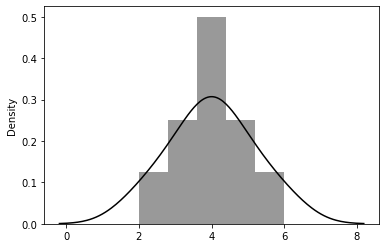

In [1]:
import numpy as np
import scipy as sns

data = np.array([2,3,3,4,4,4,4,5,5,6])
print(data)
np.sum(data)
# 평균
mu = np.sum(data)/ len(data)
print(mu)
print(np.mean(data))

# 분산
## 편차 제곱의 평균
var = np.sum((data - mu)**2) / len(data)
print(var)
print(np.var(data))

# 불편분산
## 표본집단의 분산 (과소추정을 막기위함)
unbiasedVar = np.sum((data - mu)**2) / (len(data)-1)
print(unbiasedVar)
print(np.var(data,ddof=1)) #ddof = 1 -> N-1

#표준편차
sigma = np.sqrt(unbiasedVar)
print(sigma)
print(np.std(data,ddof=1))

#공분산 Cov(x,y)
## 2개 변수의 관계성을 확인
## 공분산이 양수다 = 2 변수는 양의 관계를 가진다
## 즉, x가 증가할 때 y도 증가한다
# (피어슨) 상관계수 = 공분산 / 표준화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.displot(data, bins=5, color='black');
sns.distplot(data,bins=5,color='black',kde=True)


In [3]:
import pandas as pd
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [4]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [5]:
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

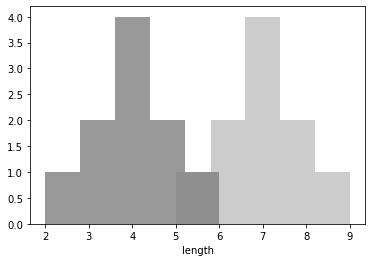

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(length_a, bins=5, color = 'black', kde = False);
sns.distplot(length_b, bins=5, color = 'gray', kde = False);

<AxesSubplot:xlabel='species', ylabel='length'>

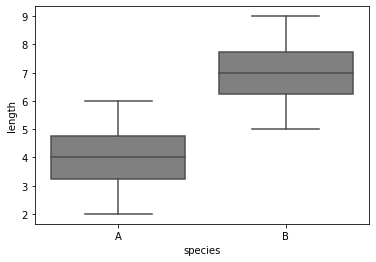

In [8]:
sns.boxplot(x = "species", y="length", data = fish_multi, color="gray")

<AxesSubplot:xlabel='species', ylabel='length'>

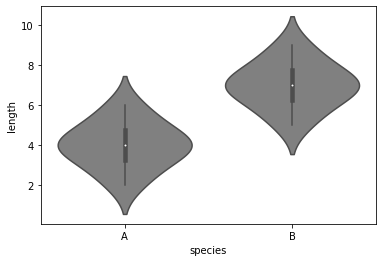

In [9]:
#밀도함수
sns.violinplot(x = "species", y="length", data = fish_multi, color="gray");

In [11]:
 cov_data = pd.read_csv("3-2-3-cov.csv")
 cov_data


,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


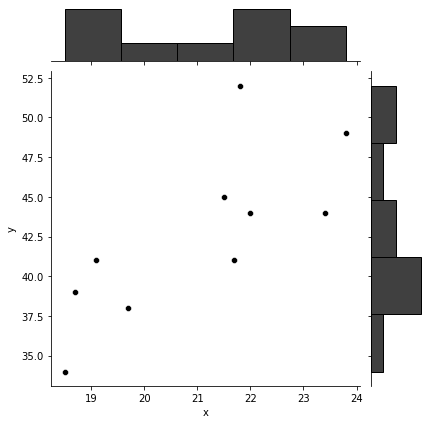

In [14]:
#x,y를 scatter인데 x,y데이터를 보여줌
sns.jointplot(x="x",y="y",data=cov_data, color='black');

In [15]:
##

In [16]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# 비복원추출
fish_5 = np.array([2,3,4,5,6])
np.random.choice(fish_5,size=1,replace=False)


array([4])

In [21]:
np.random.choice(fish_5,size=3,replace=False)


array([3, 4, 5])

In [22]:
# random seed 고정
np.random.seed(13)
np.random.choice(fish_5,size=3,replace=False) #이제 동일하게 나옴

array([3, 5, 6])

In [23]:
np.mean(data)

4.0

In [24]:
fish_100000 = pd.read_csv("3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [25]:
sampling_result = np.random.choice(fish_100000,size=10,replace=False)
sampling_result

array([4.75108188, 4.37498586, 3.78013026, 2.96949093, 2.68097807,
       5.00637838, 4.31302466, 3.46929683, 5.16443516, 3.2858849 ])

In [26]:
np.mean(sampling_result)

3.9795686948818956

In [27]:
np.mean(fish_100000) #모집단 평균도 비슷

4.000000000000023

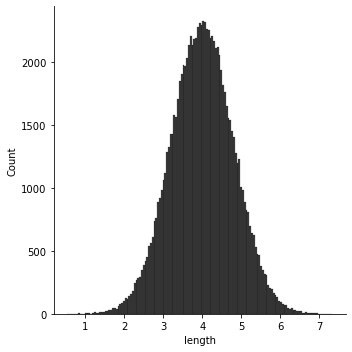

In [29]:
sns.displot(fish_100000,kde=False,color='black');

In [31]:
np.mean(fish_100000), np.var(fish_100000)

(4.000000000000023, 0.6400000000000087)

In [32]:
x = np.arange(1,7.1,0.1) # 1~7까지 0.1간격

In [34]:
stats.norm.pdf(x=x, loc=4, scale=0.8) #평균이 4, 표준편차가 0.8인 정규분포를 따르는 난수

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

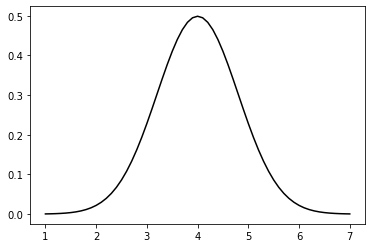

In [36]:
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black');

C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


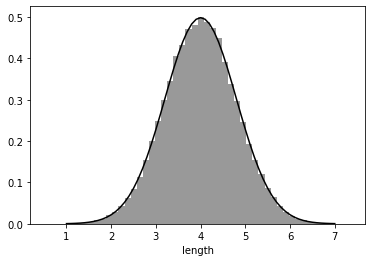

In [40]:
#방금 물고기 데이터는 정규분포를 따른다
sns.distplot(fish_100000,kde=False, color='black', norm_hist=True);
plt.plot(x, stats.norm.pdf(x=x,loc=4, scale=0.8), color='black');